In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from neuralprophet import NeuralProphet
from fbprophet import Prophet

In [3]:
df = pd.read_csv('store_sharing.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


In [16]:
df.tail(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [4]:
hourlydf = df[['timestamp', 'cnt']].copy()
hourlydf = hourlydf.set_index('timestamp')
hourlydf.head(2)

,cnt
timestamp,
2015-01-04 00:00:00,182
2015-01-04 01:00:00,138


In [5]:
daydf = hourlydf.resample('D').sum()
daydf.head()

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601


In [7]:
daydf['timestamp'] = daydf.index
daydf.index = range(0, len(daydf['cnt'].to_numpy()))
daydf.insert(2, "y", daydf['cnt'])
daydf = daydf.drop(columns=['cnt'], axis=1)
daydf = daydf.rename(columns={'timestamp':'ds'})
daydf.head(3)

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613


In [8]:
hourlydf['timestamp'] = hourlydf.index
hourlydf.index = range(0, len(hourlydf['cnt'].to_numpy()))
hourlydf.insert(2, "y", hourlydf['cnt'])
hourlydf = hourlydf.drop(columns=['cnt'], axis=1)
hourlydf = hourlydf.rename(columns={'timestamp':'ds'})
hourlydf.head(3)

,ds,y
0,2015-01-04 00:00:00,182
1,2015-01-04 01:00:00,138
2,2015-01-04 02:00:00,134


#### Plotting Predictions

In [9]:
def plot_predictions(df):
    dayModel = Prophet()
    dayModel.fit(df)
    dayFuture = dayModel.make_future_dataframe(periods=365)
    day_pred = dayModel.predict(dayFuture)
    
    fig, ax = plt.subplots(1, figsize=(12,6))
    dayModel.plot(day_pred, ax=ax)
    plt.title('Bike Share Prediction Per Day', fontsize=20)
    plt.xlabel('Date', fontsize= 14)
    plt.ylabel('Amount of Bike Shares')
    plt.show()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


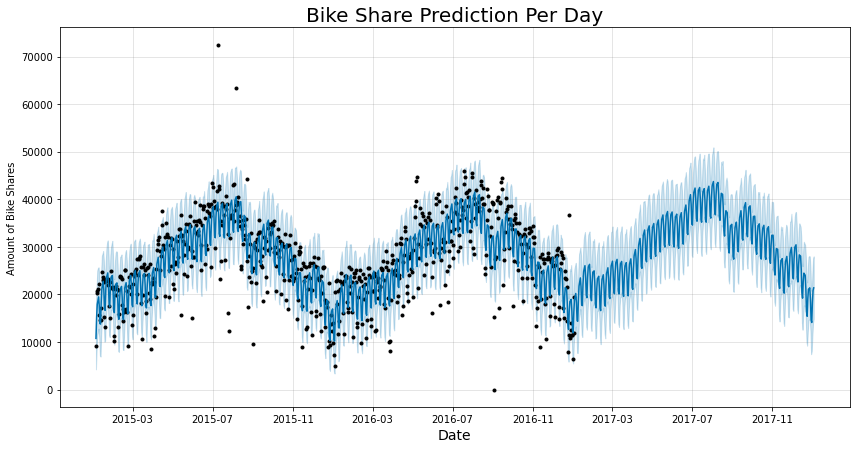

In [10]:
plot_predictions(daydf)

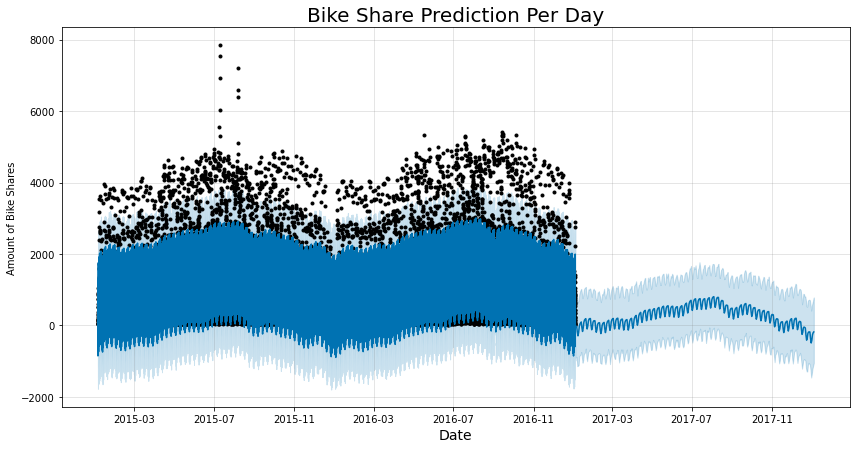

In [11]:
plot_predictions(hourlydf)

### Neural Prophet Modelling

In [13]:
def plot_forecast(df):
    neuralModel = NeuralProphet()
    
    if pd.DatetimeIndex(df['ds']).day[0] < pd.DatetimeIndex(df['ds']).day[1]:
        metrics = neuralModel.fit(df, freq='D')
    else:
        metrics = neuralModel.fit(df, freq='H')
        
    neural_future = neuralModel.make_future_dataframe(df, periods=365)
    neural_forecast = neuralModel.predict(neural_future)
    forecasts_plot = neuralModel.plot(neural_forecast)
    fig_comp = neuralModel.plot_components(neural_forecast)

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:nprophet.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO:nprophet.config:Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 43
INFO:nprophet.config:Auto-set epochs to 43


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
INFO:nprophet:learning rate range test found optimal lr: 4.33E-01
Epoch[43/43]: 100%|██████████| 43/43 [00:17<00:00,  2.52it/s, SmoothL1Loss=0.00636, MAE=3.92e+3, RegLoss=0]


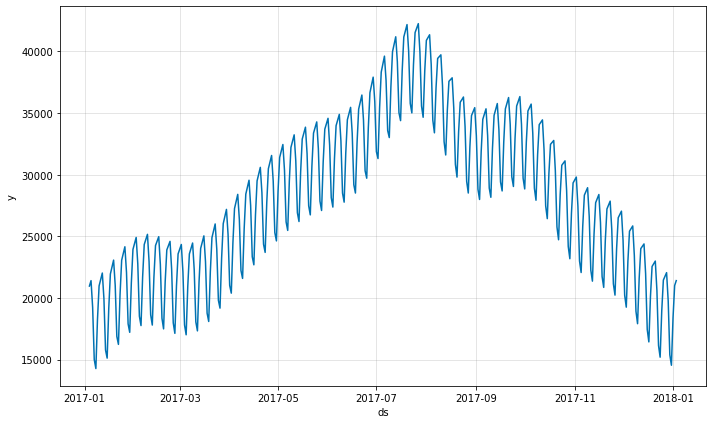

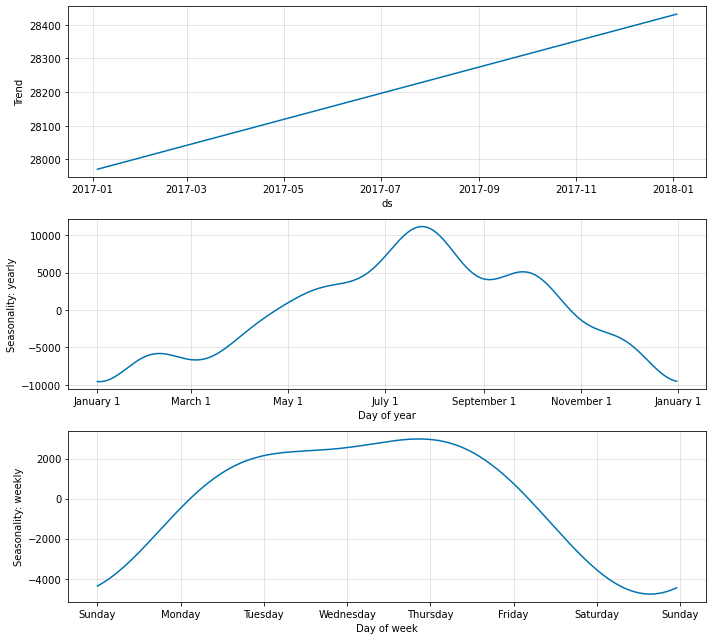

In [14]:
plot_forecast(daydf)

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 128
INFO:nprophet.config:Auto-set batch_size to 128
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 7
INFO:nprophet.config:Auto-set epochs to 7


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
INFO:nprophet:learning rate range test found optimal lr: 2.85E-01
Epoch[7/7]: 100%|██████████| 7/7 [00:08<00:00,  1.19s/it, SmoothL1Loss=0.0194, MAE=445, RegLoss=0]  


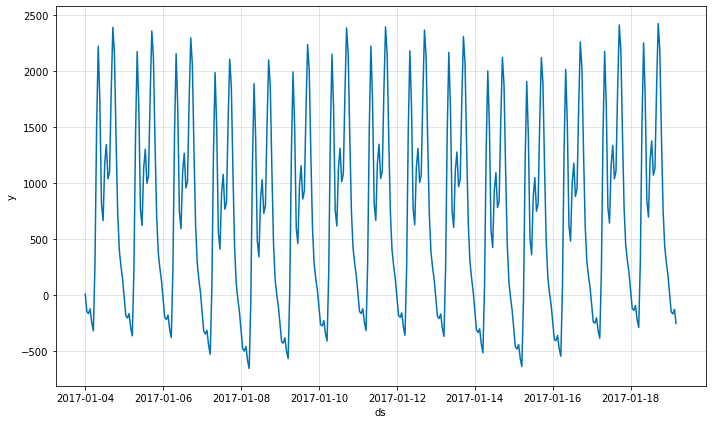

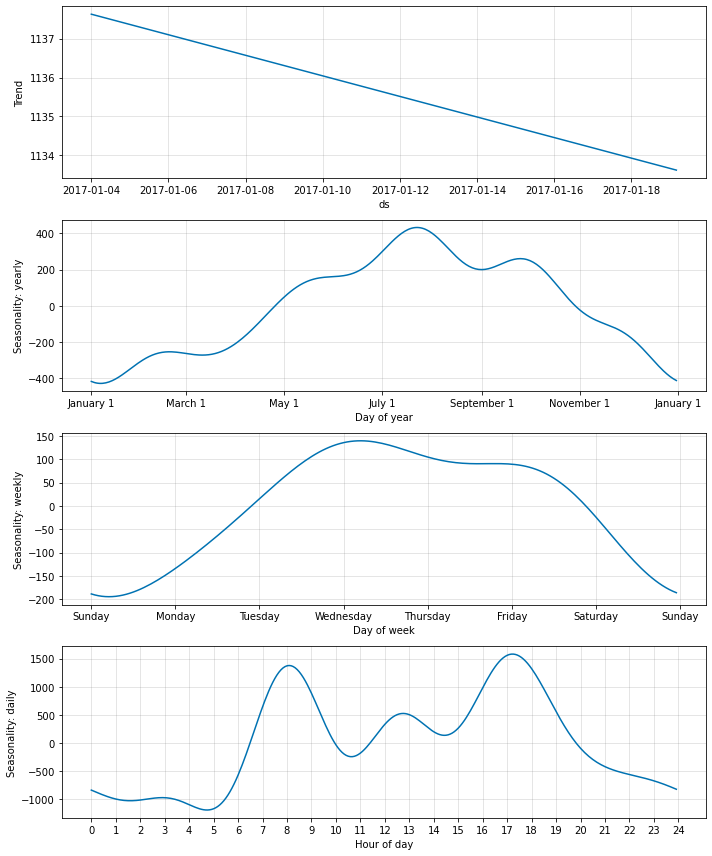

In [17]:
plot_forecast(hourlydf)

- Both Prophet and NeuralProphet performed well at capturing the trend. Although Neural Prophet Model has less predictors it does great even better at capturing trend. 